In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

pd.set_option('max_columns', None)
pd.set_option('max_rows', 50)

# Weather Data

### Read Data from CSV

In [2]:
raw = pd.read_csv('data/wxkslc.csv', low_memory=False)
raw.head()

,Station_ID,Date_Time,altimeter_set_1,air_temp_set_1,dew_point_temperature_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,sea_level_pressure_set_1,weather_cond_code_set_1,cloud_layer_3_code_set_1,pressure_tendency_set_1,qc_set_1,precip_accum_one_hour_set_1,precip_accum_three_hour_set_1,metar_origin_set_1,cloud_layer_1_code_set_1,cloud_layer_2_code_set_1,precip_accum_six_hour_set_1,precip_accum_24_hour_set_1,visibility_set_1,metar_remark_set_1,metar_set_1,air_temp_high_6_hour_set_1,air_temp_low_6_hour_set_1,peak_wind_speed_set_1,ceiling_set_1,pressure_change_code_set_1,air_temp_high_24_hour_set_1,air_temp_low_24_hour_set_1,peak_wind_direction_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d,pressure_set_1d,sea_level_pressure_set_1d,heat_index_set_1d,weather_condition_set_1d,weather_condition_set_2d,weather_condition_set_3d
0,NaN,NaN,INHG,Fahrenheit,Fahrenheit,%,knots,Degrees,knots,Inches,Millibars,code,code,code,code,Inches,Inches,code,code,code,Inches,Inches,Statute miles,text,text,Fahrenheit,Fahrenheit,knots,Feet,code,Fahrenheit,Fahrenheit,Degrees,Fahrenheit,Fahrenheit,Code,Millibars,Millibars,Fahrenheit,Code,NaN,NaN
1,KSLC,2016-01-01T00:00:00Z,30.45,12.02,6.08,76.51,9.0,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,2.9,N,883.05,1027.38,NaN,Clear,NaN,NaN
2,KSLC,2016-01-01T00:05:00Z,30.45,12.02,6.08,76.51,7.0,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,NaN,N,883.05,1027.38,NaN,Clear,NaN,NaN
3,KSLC,2016-01-01T00:10:00Z,30.45,12.02,6.08,76.51,7.0,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,NaN,N,883.05,1027.38,NaN,Clear,NaN,NaN
4,KSLC,2016-01-01T00:15:00Z,30.45,12.02,5.0,72.82,7.0,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.88,NaN,N,883.05,1027.41,NaN,Clear,NaN,NaN


### Select Relevant Features

In [3]:
selectCol = raw[['Date_Time','air_temp_set_1','dew_point_temperature_set_1d',
                 'wind_speed_set_1','wind_direction_set_1','wind_gust_set_1',
                 'snow_depth_set_1','cloud_layer_1_code_set_1',
                 'cloud_layer_2_code_set_1','cloud_layer_3_code_set_1',
                 'visibility_set_1','ceiling_set_1','weather_condition_set_1d',
                 'weather_condition_set_2d','weather_condition_set_3d']]

In [4]:
selectRow = selectCol.iloc[1:]
selectRow.head()

,Date_Time,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,cloud_layer_1_code_set_1,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1,visibility_set_1,ceiling_set_1,weather_condition_set_1d,weather_condition_set_2d,weather_condition_set_3d
1,2016-01-01T00:00:00Z,12.02,5.98,9.0,360.0,NaN,NaN,1.0,NaN,NaN,9.0,NaN,Clear,NaN,NaN
2,2016-01-01T00:05:00Z,12.02,5.98,7.0,360.0,NaN,NaN,1.0,NaN,NaN,10.0,NaN,Clear,NaN,NaN
3,2016-01-01T00:10:00Z,12.02,5.98,7.0,360.0,NaN,NaN,1.0,NaN,NaN,10.0,NaN,Clear,NaN,NaN
4,2016-01-01T00:15:00Z,12.02,4.88,7.0,360.0,NaN,NaN,1.0,NaN,NaN,10.0,NaN,Clear,NaN,NaN
5,2016-01-01T00:20:00Z,10.94,4.9,7.0,350.0,NaN,NaN,1.0,NaN,NaN,10.0,NaN,Clear,NaN,NaN


### Dealing with Missing Values

First take a look at the rows with most values missing and the missing value rate for each feature.

In [5]:
#rows with most features missing
mostNaN = selectRow.loc[selectRow.apply(lambda x:x.isnull().sum()>=14, axis=1)]
mostNaN.head()

,Date_Time,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,cloud_layer_1_code_set_1,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1,visibility_set_1,ceiling_set_1,weather_condition_set_1d,weather_condition_set_2d,weather_condition_set_3d
19864,2016-03-09T16:30:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51919,2016-07-29T14:30:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52021,2016-07-29T22:20:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52031,2016-07-29T23:05:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52090,2016-07-30T03:40:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#missing value rate
missingRateBefore = selectRow.apply(lambda x: x.isnull().sum()/x.size, axis=0)
missingRateBefore

Date_Time                       0.000000
air_temp_set_1                  0.000805
dew_point_temperature_set_1d    0.000805
wind_speed_set_1                0.005159
wind_direction_set_1            0.017921
wind_gust_set_1                 0.924559
snow_depth_set_1                0.996531
cloud_layer_1_code_set_1        0.007405
cloud_layer_2_code_set_1        0.781717
cloud_layer_3_code_set_1        0.905902
visibility_set_1                0.001004
ceiling_set_1                   0.691088
weather_condition_set_1d        0.007415
weather_condition_set_2d        0.973809
weather_condition_set_3d        0.998549
dtype: float64

For **Date_Time**, there are no missing values.

In [7]:
perfect = selectRow['Date_Time']
perfect.head()

1    2016-01-01T00:00:00Z
2    2016-01-01T00:05:00Z
3    2016-01-01T00:10:00Z
4    2016-01-01T00:15:00Z
5    2016-01-01T00:20:00Z
Name: Date_Time, dtype: object

For features that **have value in most of the rows**, use the strategy that replacing the missing value with the last valid observation in the time series.

In [8]:
common_raw = selectRow[['air_temp_set_1','dew_point_temperature_set_1d','wind_speed_set_1',
                        'wind_direction_set_1','cloud_layer_1_code_set_1','visibility_set_1',
                        'weather_condition_set_1d']]
common = common_raw.fillna(method='ffill')
common.head()

,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1,weather_condition_set_1d
1,12.02,5.98,9.0,360.0,1.0,9.0,Clear
2,12.02,5.98,7.0,360.0,1.0,10.0,Clear
3,12.02,5.98,7.0,360.0,1.0,10.0,Clear
4,12.02,4.88,7.0,360.0,1.0,10.0,Clear
5,10.94,4.9,7.0,350.0,1.0,10.0,Clear


In [9]:
common1 = common.iloc[:,0:-1]
common1.head()

,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1
1,12.02,5.98,9.0,360.0,1.0,9.0
2,12.02,5.98,7.0,360.0,1.0,10.0
3,12.02,5.98,7.0,360.0,1.0,10.0
4,12.02,4.88,7.0,360.0,1.0,10.0
5,10.94,4.9,7.0,350.0,1.0,10.0


In [10]:
common2 = common.iloc[:,-1]
common2.head()

1    Clear
2    Clear
3    Clear
4    Clear
5    Clear
Name: weather_condition_set_1d, dtype: object

For features that **have value missing in most of the rows**, use different strategy respectively.

In [11]:
rare = selectRow[['wind_gust_set_1','snow_depth_set_1','cloud_layer_2_code_set_1',
                  'cloud_layer_3_code_set_1','ceiling_set_1','weather_condition_set_2d',
                  'weather_condition_set_3d']]
rare.head()

,wind_gust_set_1,snow_depth_set_1,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1,ceiling_set_1,weather_condition_set_2d,weather_condition_set_3d
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For **Wind Gust** and **Snow Depth**, replace with 0. 

In [12]:
rare1 = rare[['wind_gust_set_1','snow_depth_set_1']].fillna(0)
rare1.head()

,wind_gust_set_1,snow_depth_set_1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0


For **Cloud**, replace with a value great than the maximum (which means the clouds are too high to affect flight operations).

In [13]:
pd.to_numeric(common['cloud_layer_1_code_set_1']).describe()

count    100608.000000
mean        320.051258
std         477.498206
min           1.000000
25%           1.000000
50%           1.000000
75%         604.000000
max        2506.000000
Name: cloud_layer_1_code_set_1, dtype: float64

In [14]:
pd.to_numeric(rare['cloud_layer_2_code_set_1']).describe()

count    21961.000000
mean       962.164564
std        574.447035
min         62.000000
25%        552.000000
50%        854.000000
75%       1204.000000
max       2806.000000
Name: cloud_layer_2_code_set_1, dtype: float64

In [15]:
pd.to_numeric(rare['cloud_layer_3_code_set_1']).describe()

count    9467.000000
mean     1271.244217
std       684.126026
min       114.000000
25%       704.000000
50%      1103.000000
75%      2003.000000
max      2803.000000
Name: cloud_layer_3_code_set_1, dtype: float64

In [16]:
rare2 = rare[['cloud_layer_2_code_set_1','cloud_layer_3_code_set_1']].fillna(5000)
rare2.head()

,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1
1,5000,5000
2,5000,5000
3,5000,5000
4,5000,5000
5,5000,5000


For **Ceiling**, replace with maximum.

In [17]:
maxVal = pd.to_numeric(rare['ceiling_set_1']).max()
maxVal

28000.0

In [18]:
rare3 = rare[['ceiling_set_1']].fillna(maxVal)
rare3.head()

,ceiling_set_1
1,28000
2,28000
3,28000
4,28000
5,28000


For Weather Condition, do nothing.

In [19]:
rare4 = rare[['weather_condition_set_2d','weather_condition_set_3d']]
rare4.head()

,weather_condition_set_2d,weather_condition_set_3d
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN


### Feature Encoding 

Change date and time features to **DateTime** format.

In [20]:
perfect_dt = perfect.apply(lambda x:datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ'))
perfect_dt.head()

1   2016-01-01 00:00:00
2   2016-01-01 00:05:00
3   2016-01-01 00:10:00
4   2016-01-01 00:15:00
5   2016-01-01 00:20:00
Name: Date_Time, dtype: datetime64[ns]

Change numeric features to **float** format.

In [21]:
common1_num = common1.apply(pd.to_numeric, errors='raise')
common1_num.head()

,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1
1,12.02,5.98,9.0,360.0,1.0,9.0
2,12.02,5.98,7.0,360.0,1.0,10.0
3,12.02,5.98,7.0,360.0,1.0,10.0
4,12.02,4.88,7.0,360.0,1.0,10.0
5,10.94,4.90,7.0,350.0,1.0,10.0


In [22]:
rare1_num = rare1.apply(pd.to_numeric, errors='raise')
rare1_num.head()

,wind_gust_set_1,snow_depth_set_1
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0


In [23]:
rare2_num = rare2.apply(pd.to_numeric, errors='raise')
rare2_num.head()

,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1
1,5000.0,5000.0
2,5000.0,5000.0
3,5000.0,5000.0
4,5000.0,5000.0
5,5000.0,5000.0


In [24]:
rare3_num = rare3.apply(pd.to_numeric, errors='raise')
rare3_num.head()

,ceiling_set_1
1,28000.0
2,28000.0
3,28000.0
4,28000.0
5,28000.0


For categorical feature 'Weather Condition', binarize with **dummy/indicator** variables.

In [25]:
wx_cond_set1 = set(common2.unique())

In [26]:
wx_cond_set2 = set(rare4.iloc[:,0].unique())

In [27]:
wx_cond_set3 = set(rare4.iloc[:,1].unique())

In [28]:
wx_bin = pd.get_dummies(common2)
wx_bin.head()

,Blowing Dust,Blowing Snow,Clear,Fog,Frz Rain,Hail,Haze,Heavy Rain,Heavy Rain/Thunderstorm,Heavy Snow,Ice Fog,Ice pellets,Light Frz Rain,Light Ice Pellets,Light Rain,Light Rain/Thunderstorm,Light Snow,Light Snow Pellets,Mostly Clear,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Snow,Snow Pellets,Squalls,Thunder,Thunderstorm,Unknown Precip
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
wx_bin2 = pd.get_dummies(rare4)
wx_bin2.head()

,weather_condition_set_2d_Fog,weather_condition_set_2d_Haze,weather_condition_set_2d_Ice Fog,weather_condition_set_2d_Light Rain,weather_condition_set_2d_Light Snow,weather_condition_set_2d_Light Snow Pellets,weather_condition_set_2d_Light Snow Shower,weather_condition_set_2d_Rain,weather_condition_set_2d_Snow,weather_condition_set_2d_Snow Pellets,weather_condition_set_2d_Squalls,weather_condition_set_3d_Fog,weather_condition_set_3d_Rain
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
wx_bin['Light Snow Shower'] = wx_bin2['weather_condition_set_2d_Light Snow Shower']

In [31]:
for wx in wx_cond_set2:
    name = str(wx)
    if(name == 'nan'):
        continue
    wx_bin[name] = wx_bin[name] | wx_bin2['weather_condition_set_2d_'+name]

for wx in wx_cond_set3:
    name = str(wx)
    if(name == 'nan'):
        continue
    wx_bin[name] = wx_bin[name] | wx_bin2['weather_condition_set_3d_'+name]

In [32]:
wx_bin.head()

,Blowing Dust,Blowing Snow,Clear,Fog,Frz Rain,Hail,Haze,Heavy Rain,Heavy Rain/Thunderstorm,Heavy Snow,Ice Fog,Ice pellets,Light Frz Rain,Light Ice Pellets,Light Rain,Light Rain/Thunderstorm,Light Snow,Light Snow Pellets,Mostly Clear,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Snow,Snow Pellets,Squalls,Thunder,Thunderstorm,Unknown Precip,Light Snow Shower
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Concatenate Together 

In [33]:
wx = pd.concat([perfect_dt, common1_num, rare1_num, rare2_num, rare3_num, wx_bin], axis=1)

In [34]:
wx.head()

,Date_Time,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1,wind_gust_set_1,snow_depth_set_1,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1,ceiling_set_1,Blowing Dust,Blowing Snow,Clear,Fog,Frz Rain,Hail,Haze,Heavy Rain,Heavy Rain/Thunderstorm,Heavy Snow,Ice Fog,Ice pellets,Light Frz Rain,Light Ice Pellets,Light Rain,Light Rain/Thunderstorm,Light Snow,Light Snow Pellets,Mostly Clear,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Snow,Snow Pellets,Squalls,Thunder,Thunderstorm,Unknown Precip,Light Snow Shower
1,2016-01-01 00:00:00,12.02,5.98,9.0,360.0,1.0,9.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-01-01 00:05:00,12.02,5.98,7.0,360.0,1.0,10.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-01-01 00:10:00,12.02,5.98,7.0,360.0,1.0,10.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-01-01 00:15:00,12.02,4.88,7.0,360.0,1.0,10.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2016-01-01 00:20:00,10.94,4.90,7.0,350.0,1.0,10.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Flight Data

### Read Data from CSV

In [35]:
from_raw = pd.read_csv('data/fromslc.csv', index_col=0, low_memory=False)
from_raw.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2016,1,1,1,5,2016-01-01,AA,19805,AA,N4YSAA,78,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1547,1634.0,47.0,47.0,1.0,3.0,1500-1559,10.0,1644.0,1946.0,5.0,1925,1951.0,26.0,26.0,1.0,1.0,1900-1959,0.0,NaN,0.0,158.0,137.0,122.0,1.0,989.0,4,18.0,0.0,0.0,0.0,8.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,2,6,2016-01-02,AA,19805,AA,N466AA,78,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1547,1539.0,-8.0,0.0,0.0,-1.0,1500-1559,14.0,1553.0,1901.0,18.0,1925,1919.0,-6.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,158.0,160.0,128.0,1.0,989.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,3,7,2016-01-03,AA,19805,AA,N487AA,78,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1547,1558.0,11.0,11.0,0.0,0.0,1500-1559,15.0,1613.0,1920.0,5.0,1925,1925.0,0.0,0.0,0.0,0.0,1900-1959,0.0,NaN,0.0,158.0,147.0,127.0,1.0,989.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,4,1,2016-01-04,AA,19805,AA,N479AA,78,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1547,1542.0,-5.0,0.0,0.0,-1.0,1500-1559,17.0,1559.0,1914.0,6.0,1925,1920.0,-5.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,158.0,158.0,135.0,1.0,989.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,5,2,2016-01-05,AA,19805,AA,N3GRAA,78,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1547,1548.0,1.0,1.0,0.0,0.0,1500-1559,15.0,1603.0,1906.0,9.0,1923,1915.0,-8.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,156.0,147.0,123.0,1.0,989.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Select Relevant Features

In [36]:
from_select = from_raw[['Month','DayofMonth','DayOfWeek','AirlineID','TailNum','FlightNum',
                        'DestAirportID','CRSDepTime','FlightDate','CRSArrTime','Distance',
                        'DepDel15']]
from_select.head()

,Month,DayofMonth,DayOfWeek,AirlineID,TailNum,FlightNum,DestAirportID,CRSDepTime,FlightDate,CRSArrTime,Distance,DepDel15
0,1,1,5,19805,N4YSAA,78,11298,1547,2016-01-01,1925,989.0,1.0
1,1,2,6,19805,N466AA,78,11298,1547,2016-01-02,1925,989.0,0.0
2,1,3,7,19805,N487AA,78,11298,1547,2016-01-03,1925,989.0,0.0
3,1,4,1,19805,N479AA,78,11298,1547,2016-01-04,1925,989.0,0.0
4,1,5,2,19805,N3GRAA,78,11298,1547,2016-01-05,1923,989.0,0.0


### Drop Missing Values

In [37]:
fr = from_select.dropna(axis=0, how='any')

In [38]:
fr.is_copy = False #disable false positive warnings

### Feature Encoding 

Change circraft tail number to numberic.

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [40]:
fr.loc[:,'TailNum'] = le.fit_transform(fr.loc[:,'TailNum'])

Convert departure time and arriving time to 4-digit string.

In [41]:
fr.loc[:,'CRSDepTime'] = fr.loc[:,'CRSDepTime'].apply(lambda x:str(x).zfill(4))
fr.loc[:,'CRSArrTime'] = fr.loc[:,'CRSArrTime'].apply(lambda x:str(x).zfill(4))

Create another feature "DateTime" by concatenating flight date and arring time for joining with weather data.

In [42]:
fr['DateTime'] = fr.loc[:,'FlightDate'].astype(str)+'T'+fr.loc[:,'CRSDepTime'].astype(str)
fr.drop('FlightDate', axis=1, inplace=True)

In [43]:
fr.loc[:,'DateTime'] = fr.loc[:,'DateTime'].apply(lambda x:
                                                  datetime.strptime(x,'%Y-%m-%dT%H%M'))

Convert departure time and arriving time to numeric.

In [44]:
fr.loc[:,'CRSDepTime'] = fr.loc[:,'CRSDepTime'].apply(pd.to_numeric, errors='raise')
fr.loc[:,'CRSArrTime'] = fr.loc[:,'CRSArrTime'].apply(pd.to_numeric, errors='raise')

In [45]:
fr.head()

,Month,DayofMonth,DayOfWeek,AirlineID,TailNum,FlightNum,DestAirportID,CRSDepTime,CRSArrTime,Distance,DepDel15,DateTime
0,1,1,5,19805,1418,78,11298,1547,1925,989.0,1.0,2016-01-01 15:47:00
1,1,2,6,19805,1257,78,11298,1547,1925,989.0,0.0,2016-01-02 15:47:00
2,1,3,7,19805,1336,78,11298,1547,1925,989.0,0.0,2016-01-03 15:47:00
3,1,4,1,19805,1307,78,11298,1547,1925,989.0,0.0,2016-01-04 15:47:00
4,1,5,2,19805,928,78,11298,1547,1923,989.0,0.0,2016-01-05 15:47:00


# Join 

Round-up the arriving time to every 5 minutes in order to join with weather data.

In [46]:
fr.loc[:,'DateTime'] = fr.loc[:,'DateTime'] \
.apply(lambda x:x - timedelta(minutes=x.minute % 5))

Join the flight operation data and weather data.

In [47]:
join = pd.merge(fr, wx, left_on='DateTime', right_on='Date_Time', how='inner')
join = join.rename(columns={'DepDel15':'temp'})
join['DepDel15'] = join['temp']
join = join.drop(['DateTime', 'Date_Time', 'temp'], axis=1)

In [48]:
join.head()

,Month,DayofMonth,DayOfWeek,AirlineID,TailNum,FlightNum,DestAirportID,CRSDepTime,CRSArrTime,Distance,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1,wind_gust_set_1,snow_depth_set_1,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1,ceiling_set_1,Blowing Dust,Blowing Snow,Clear,Fog,Frz Rain,Hail,Haze,Heavy Rain,Heavy Rain/Thunderstorm,Heavy Snow,Ice Fog,Ice pellets,Light Frz Rain,Light Ice Pellets,Light Rain,Light Rain/Thunderstorm,Light Snow,Light Snow Pellets,Mostly Clear,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Snow,Snow Pellets,Squalls,Thunder,Thunderstorm,Unknown Precip,Light Snow Shower,DepDel15
0,1,1,5,19805,1418,78,11298,1547,1925,989.0,3.02,-0.09,4.00,330.0,1.0,7.0,0.0,0.0,5000.0,5000.0,28000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,1,2,6,19805,1257,78,11298,1547,1925,989.0,12.02,6.89,2.99,140.0,606.0,10.0,0.0,0.0,1306.0,1803.0,18000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
2,1,3,7,19805,1336,78,11298,1547,1925,989.0,21.92,15.88,0.00,0.0,1206.0,10.0,0.0,0.0,1503.0,5000.0,15000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
3,1,4,1,19805,1307,78,11298,1547,1925,989.0,19.94,17.92,0.00,0.0,1103.0,7.0,0.0,0.0,5000.0,5000.0,11000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
4,1,5,2,19805,928,78,11298,1547,1923,989.0,28.94,26.01,5.00,260.0,556.0,5.0,0.0,0.0,704.0,5000.0,7000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


# Preparation for Prediction

In [49]:
total = join.as_matrix()

In [50]:
Xraw = total[:,:-1]
y = total[:,-1]

### Feature Selection

Although we preselected some features that might affect flight operation by the experience, there are also some tools like **f_classif** to help us select features furthermore to filter out bad features. Here we keep only 33 out of 51 features with $p-value\le0.1$.

In [51]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [52]:
fval, pval = f_classif(Xraw,y)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [21 25 29 48 50] are constant.
  UserWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [53]:
m = (pval<0.1).sum()
m

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


29

In [54]:
kb = SelectKBest(k=m)
Xprime = kb.fit_transform(Xraw,y)
selected = kb.get_support()

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [21 25 29 48 50] are constant.
  UserWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [55]:
pd.DataFrame([fval,pval,selected], columns=join.columns.delete(-1), 
             index=['f-value','p-value','selected'])

,Month,DayofMonth,DayOfWeek,AirlineID,TailNum,FlightNum,DestAirportID,CRSDepTime,CRSArrTime,Distance,air_temp_set_1,dew_point_temperature_set_1d,wind_speed_set_1,wind_direction_set_1,cloud_layer_1_code_set_1,visibility_set_1,wind_gust_set_1,snow_depth_set_1,cloud_layer_2_code_set_1,cloud_layer_3_code_set_1,ceiling_set_1,Blowing Dust,Blowing Snow,Clear,Fog,Frz Rain,Hail,Haze,Heavy Rain,Heavy Rain/Thunderstorm,Heavy Snow,Ice Fog,Ice pellets,Light Frz Rain,Light Ice Pellets,Light Rain,Light Rain/Thunderstorm,Light Snow,Light Snow Pellets,Mostly Clear,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Snow,Snow Pellets,Squalls,Thunder,Thunderstorm,Unknown Precip,Light Snow Shower
f-value,95.6615,94.9302,0.0073145,131.64,26.593,317.45,6.81141,436.427,150.843,293.046,31.7903,161.955,62.0511,27.5652,2.36962,387.766,58.5989,2.66329,49.0739,27.0345,271.388,NaN,0.280675,205.347,191.415,NaN,0.561363,0.242189,4.78758,NaN,7.12617,293.268,0.280675,6.57242,6.05453,21.8832,0.00303743,178.326,0.0119201,1.16659,0.872387,21.0069,0.0152008,0.59121,444.501,0.561363,1.68425,0.000594701,NaN,2.42593,NaN
p-value,1.39727e-22,2.02096e-22,0.931844,1.87942e-30,2.51653e-07,6.81127e-71,0.00905916,1.07734e-96,1.20613e-34,1.35685e-65,1.72243e-08,4.54027e-37,3.38208e-15,1.52217e-07,0.12372,3.78696e-86,1.95156e-14,0.102692,2.48142e-12,2.00268e-07,6.88528e-61,NaN,0.59626,1.59243e-46,1.72218e-43,NaN,0.453713,0.622631,0.0286681,NaN,0.007598,1.21389e-65,0.59626,0.0103587,0.0138725,2.90157e-06,0.956049,1.22472e-40,0.91306,0.280106,0.350298,4.58221e-06,0.901877,0.441954,1.91983e-98,0.453713,0.194363,0.980544,NaN,0.119346,NaN
selected,True,True,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True,True,False,False,True,True,False,False,False,True,False,True,True,False,True,True,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False


### Feature Scaling

In [56]:
colors = ['red' if i==1.0 else 'yellow' for i in y]

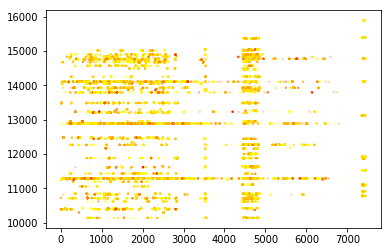

In [57]:
plt.scatter(Xprime[:, 4], Xprime[:, 5], alpha=0.2, marker='o', s=5, lw=0, color=colors)
plt.show()

In [58]:
from sklearn.preprocessing import QuantileTransformer
qtu = QuantileTransformer(output_distribution='uniform')

In [59]:
from sklearn.preprocessing import QuantileTransformer
qtn = QuantileTransformer(output_distribution='normal')

In [60]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [61]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [62]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

In [63]:
X = norm.fit_transform(Xprime)

### Data Split

In [64]:
from sklearn import model_selection

In [65]:
trainX, testX, trainy, testy = model_selection.train_test_split(X, y, test_size=0.2)

# Prediction

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dtc = DecisionTreeClassifier(max_depth=4)
predy = dtc.fit(trainX, trainy).predict(testX)

In [68]:
print('Accuracy: {0:.5f}'.format((predy==testy).sum() / testy.size))

Accuracy: 0.87906


In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc = RandomForestClassifier(n_estimators=30, max_depth=20)
predy = rfc.fit(trainX, trainy).predict(testX)

In [71]:
print('Accuracy: {0:.5f}'.format((predy==testy).sum() / testy.size))

Accuracy: 0.87991


In [72]:
from sklearn.linear_model import Perceptron

In [73]:
perc = Perceptron(max_iter=5, tol=None)
predy = perc.fit(trainX, trainy).predict(testX)

In [74]:
print('Accuracy: {0:.5f}'.format((predy==testy).sum() / testy.size))

Accuracy: 0.87879


In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
gnb = GaussianNB()
predy = gnb.fit(trainX, trainy).predict(testX)

In [77]:
print('Accuracy: {0:.5f}'.format((predy==testy).sum() / testy.size))

Accuracy: 0.78566


In [78]:
from sklearn.neural_network import MLPClassifier

In [79]:
mlpc = MLPClassifier()
predy = mlpc.fit(trainX, trainy).predict(testX)

In [80]:
print('Accuracy: {0:.5f}'.format((predy==testy).sum() / testy.size))

Accuracy: 0.87879
